### This is the repeatition script of discretization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_generator import dataGenerator2d
from variableSelection import evaluationExperiment
from efficiency_joint_discretization import jointDiscretization, stageWiseDiscretization

from os import listdir
from os.path import isfile, join

np.random.seed(100)

def compareStageJoint(stage_dim_list, joint_dim_list, stage_best_value_list, joint_best_value_list, stage_best_fmi, joint_best_fmi, index_list = ['StageWise', 'Joint']): 
    """Compare the result with stagewise and joint discretization
    """
    return pd.DataFrame({'Dimension list': [",".join([str(each) for each in stage_dim_list]),
                                    ",".join([str(each) for each in joint_dim_list])], 
                'Selected best cutpoints': [",".join([str(each) for each in stage_best_value_list]),
                                            ",".join([str(each) for each in joint_best_value_list])],
                'FMI Domain': [[min(stage_best_fmi), max(stage_best_fmi)], 
                                        [min(joint_best_fmi), max(joint_best_fmi)]]}, index=index_list)

import math
def plotting_fmi(stage_fmi_list, joint_fmi_list, n, number=1, title_name=None):
    plt.errorbar(list(map(math.log, [_+1 for _ in range(len(stage_fmi_list))])), stage_fmi_list, marker='x', label='Stage')
    plt.errorbar(list(map(math.log, [_+1 for _ in range(len(joint_fmi_list))])), joint_fmi_list, marker="P", label='Joint')
    if title_name is None:
        plt.title('Experiment ' + r'${}$'.format(number) + ' Reliable FMI '+ r'$n={}$'.format(n))
    else:
        plt.title('Experiment ' + r'${}$'.format(number) + title_name + r'$n={}$'.format(n))
    plt.xlabel("log(iteration)")
    plt.legend()

def write_csv(exp_result, exp1path, name):
    """
    name:'chi_square_Exp1_'
    """
    for key in exp_result:
        pd.DataFrame(exp_result[key]).T.to_csv(exp1path+name+str(key) +'.csv')

### Repetitions

In [2]:
model_dic = {
            'stage': stageWiseDiscretization,
            'joint': jointDiscretization
            }

In [ ]:
exp1 = evaluationExperiment(size=[20, 30, 50, 70, 100, 200], model_dic=model_dic, dataGenerator=dataGenerator2d, early_stopping='chi_square', permut=False, rr=2, irr=48, verbose=True, data_rep=10, types='independent_circle')
result1 = exp1.run()
exp1path = './Experiment1/chi_square_adjust/'
write_csv(result1, exp1path, 'Exp1_')

In [ ]:
exp2 = evaluationExperiment(size=[20, 30, 50, 70, 100, 200], model_dic=model_dic, dataGenerator=dataGenerator2d, early_stopping='chi_square', permut=False, rr=2, irr=48, verbose=True, data_rep=30, types='mixed_circle')
result2 = exp2.run()
exp2path = './Experiment2/chi_square_adjust/'
write_csv(result2, exp2path, 'Exp2_')

In [ ]:
exp3 = evaluationExperiment(size=[20, 30, 50, 70, 100, 200], model_dic=model_dic, dataGenerator=dataGenerator2d, early_stopping='chi_square', permut=False, rr=2, irr=48, verbose=True, data_rep=30, types='no_structure')
result3 = exp3.run()
exp3path = './Experiment3/chi_square_adjust/'
write_csv(result3, exp3path, 'Exp3_')

In [ ]:
exp4 = evaluationExperiment(size=[20, 30, 50, 70, 100, 200], model_dic=model_dic, dataGenerator=dataGenerator2d, early_stopping='chi_square', permut=False, rr=3, irr=48, verbose=True, data_rep=30, types='interaction')
result4 = exp4.run()
exp4path = './Experiment4/chi_square_adjust/'
write_csv(result4, exp4path, 'Exp4_')

In [ ]:
exp5 = evaluationExperiment(size=[20, 30, 50, 70, 100, 200], model_dic=model_dic, dataGenerator=dataGenerator2d, early_stopping='chi_square', permut=False, rr=2, irr=48, verbose=True, data_rep=30, types='irrelevant_only')
result5 = exp5.run()
exp5path = './Experiment5/chi_square_adjust/'
write_csv(result5, exp5path, 'Exp5_')

In [3]:
## Experiment 5
exp5path_lazy = './Experiment5/lazy/'
exp5files_lazy = [f for f in listdir(exp5path_lazy) if isfile(join(exp5path_lazy, f)) and f != '.DS_Store']

exp5path_chi = './Experiment5/chi_square_permut_false/'
exp5files_chi = [f for f in listdir(exp5path_chi) if isfile(join(exp5path_chi, f)) and f != '.DS_Store']


In [3]:
import re

def count_variables(file_path, file_name):
    """Get selected variables (variables column only)
    """
    n = int(re.split('[_.]', file_name)[1])
    dic ={n:[[], []]}
    variables_list = pd.read_csv(file_path + file_name).variables
    for string in variables_list:
        string_list = re.split(', a', string)
        _select = [len(re.findall('X\d+', each)) for each in string_list]
        dic[n][0].append(np.mean(_select))
        dic[n][1].append(np.std(_select)/math.sqrt(n))
    return dic

def count_variable_plot(file_path, files_list):
    dic = {}
    for file_name in files_list:
        dic.update(count_variables(file_path, file_name))
    sorted_dict = dict(sorted(dic.items()))
    label_list = list(sorted_dict.keys())
    mean_list = [sorted_dict[key][0][0] for key in sorted_dict], [sorted_dict[key][0][1] for key in sorted_dict]
    std_list = [sorted_dict[key][1][0] for key in sorted_dict], [sorted_dict[key][1][1] for key in sorted_dict]
    return label_list, mean_list, std_list

In [14]:
exp1path_lazy = './Experiment1/lazy/'
exp1files_lazy = [f for f in listdir(exp1path_lazy) if isfile(join(exp1path_lazy, f)) and f != '.DS_Store']

exp2path_lazy = './Experiment2/lazy/'
exp2files_lazy = [f for f in listdir(exp2path_lazy) if isfile(join(exp2path_lazy, f)) and f != '.DS_Store']

exp3path_lazy = './Experiment3/lazy/'
exp3files_lazy = [f for f in listdir(exp3path_lazy) if isfile(join(exp3path_lazy, f)) and f != '.DS_Store']

exp4path_lazy = './Experiment4/lazy/'
exp4files_lazy = [f for f in listdir(exp4path_lazy) if isfile(join(exp4path_lazy, f)) and f != '.DS_Store']

exp5path_lazy = './Experiment5/lazy/'
exp5files_lazy = [f for f in listdir(exp5path_lazy) if isfile(join(exp5path_lazy, f)) and f != '.DS_Store']

# hard coding here permut=False/chi_square
exp1path_chi = './Experiment1/chi_square/'
exp1files_chi = [f for f in listdir(exp1path_chi) if isfile(join(exp1path_chi, f)) and f != '.DS_Store']

exp2path_chi = './Experiment2/chi_square/'
exp2files_chi = [f for f in listdir(exp2path_chi) if isfile(join(exp2path_chi, f)) and f != '.DS_Store']

exp3path_chi = './Experiment3/chi_square/'
exp3files_chi = [f for f in listdir(exp3path_chi) if isfile(join(exp3path_chi, f)) and f != '.DS_Store']

exp4path_chi = './Experiment4/chi_square/'
exp4files_chi = [f for f in listdir(exp4path_chi) if isfile(join(exp4path_chi, f)) and f != '.DS_Store']

exp5path_chi = './Experiment5/chi_square/'
exp5files_chi = [f for f in listdir(exp5path_chi) if isfile(join(exp5path_chi, f)) and f != '.DS_Store']


# chi_square_adjust
exp1path_chi_adjust= './Experiment1/chi_square_adjust/'
exp1files_chi_adjust= [f for f in listdir(exp1path_chi_adjust) if isfile(join(exp1path_chi_adjust, f)) and f != '.DS_Store']

exp2path_chi_adjust = './Experiment2/chi_square_adjust/'
exp2files_chi_adjust = [f for f in listdir(exp2path_chi_adjust) if isfile(join(exp2path_chi_adjust, f)) and f != '.DS_Store']

exp3path_chi_adjust = './Experiment3/chi_square_adjust/'
exp3files_chi_adjust = [f for f in listdir(exp3path_chi_adjust) if isfile(join(exp3path_chi_adjust, f)) and f != '.DS_Store']

exp4path_chi_adjust = './Experiment4/chi_square_adjust/'
exp4files_chi_adjust = [f for f in listdir(exp4path_chi_adjust) if isfile(join(exp4path_chi_adjust, f)) and f != '.DS_Store']

exp5path_chi_adjust = './Experiment5/chi_square_adjust/'
exp5files_chi_adjust = [f for f in listdir(exp5path_chi_adjust) if isfile(join(exp5path_chi_adjust, f)) and f != '.DS_Store']


Text(0.5, 1.0, 'Stopping Criteria all irrelevant variable selection')

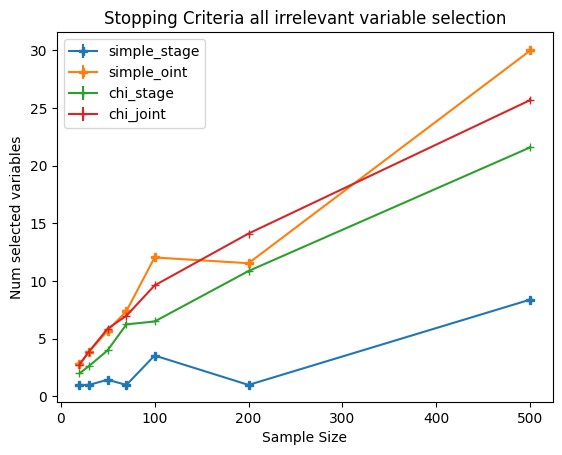

In [5]:
import matplotlib.pyplot as plt
label_list_lazy, mean_list_lazy, std_list_lazy = count_variable_plot(exp5path_lazy, exp5files_lazy)
label_list_chi, mean_list_chi, std_list_chi = count_variable_plot(exp5path_chi, exp5files_chi)

plt.errorbar(label_list_lazy, mean_list_lazy[0], marker="P", yerr = std_list_lazy[0], label='simple_stage')
plt.errorbar(label_list_lazy, mean_list_lazy[1], marker="P", yerr = std_list_lazy[1], label='simple_oint')

plt.errorbar(label_list_chi, mean_list_chi[0], marker="+", yerr = std_list_chi[0], label='chi_stage')
plt.errorbar(label_list_chi, mean_list_chi[1], marker="+", yerr = std_list_chi[1], label='chi_joint')

plt.legend()
plt.xlabel('Sample Size')
plt.ylabel('Num selected variables')
plt.title('Stopping Criteria all irrelevant variable selection')

Text(0.5, 0.98, 'simple stopping with reliable estimator vs chi square with naive estimator')

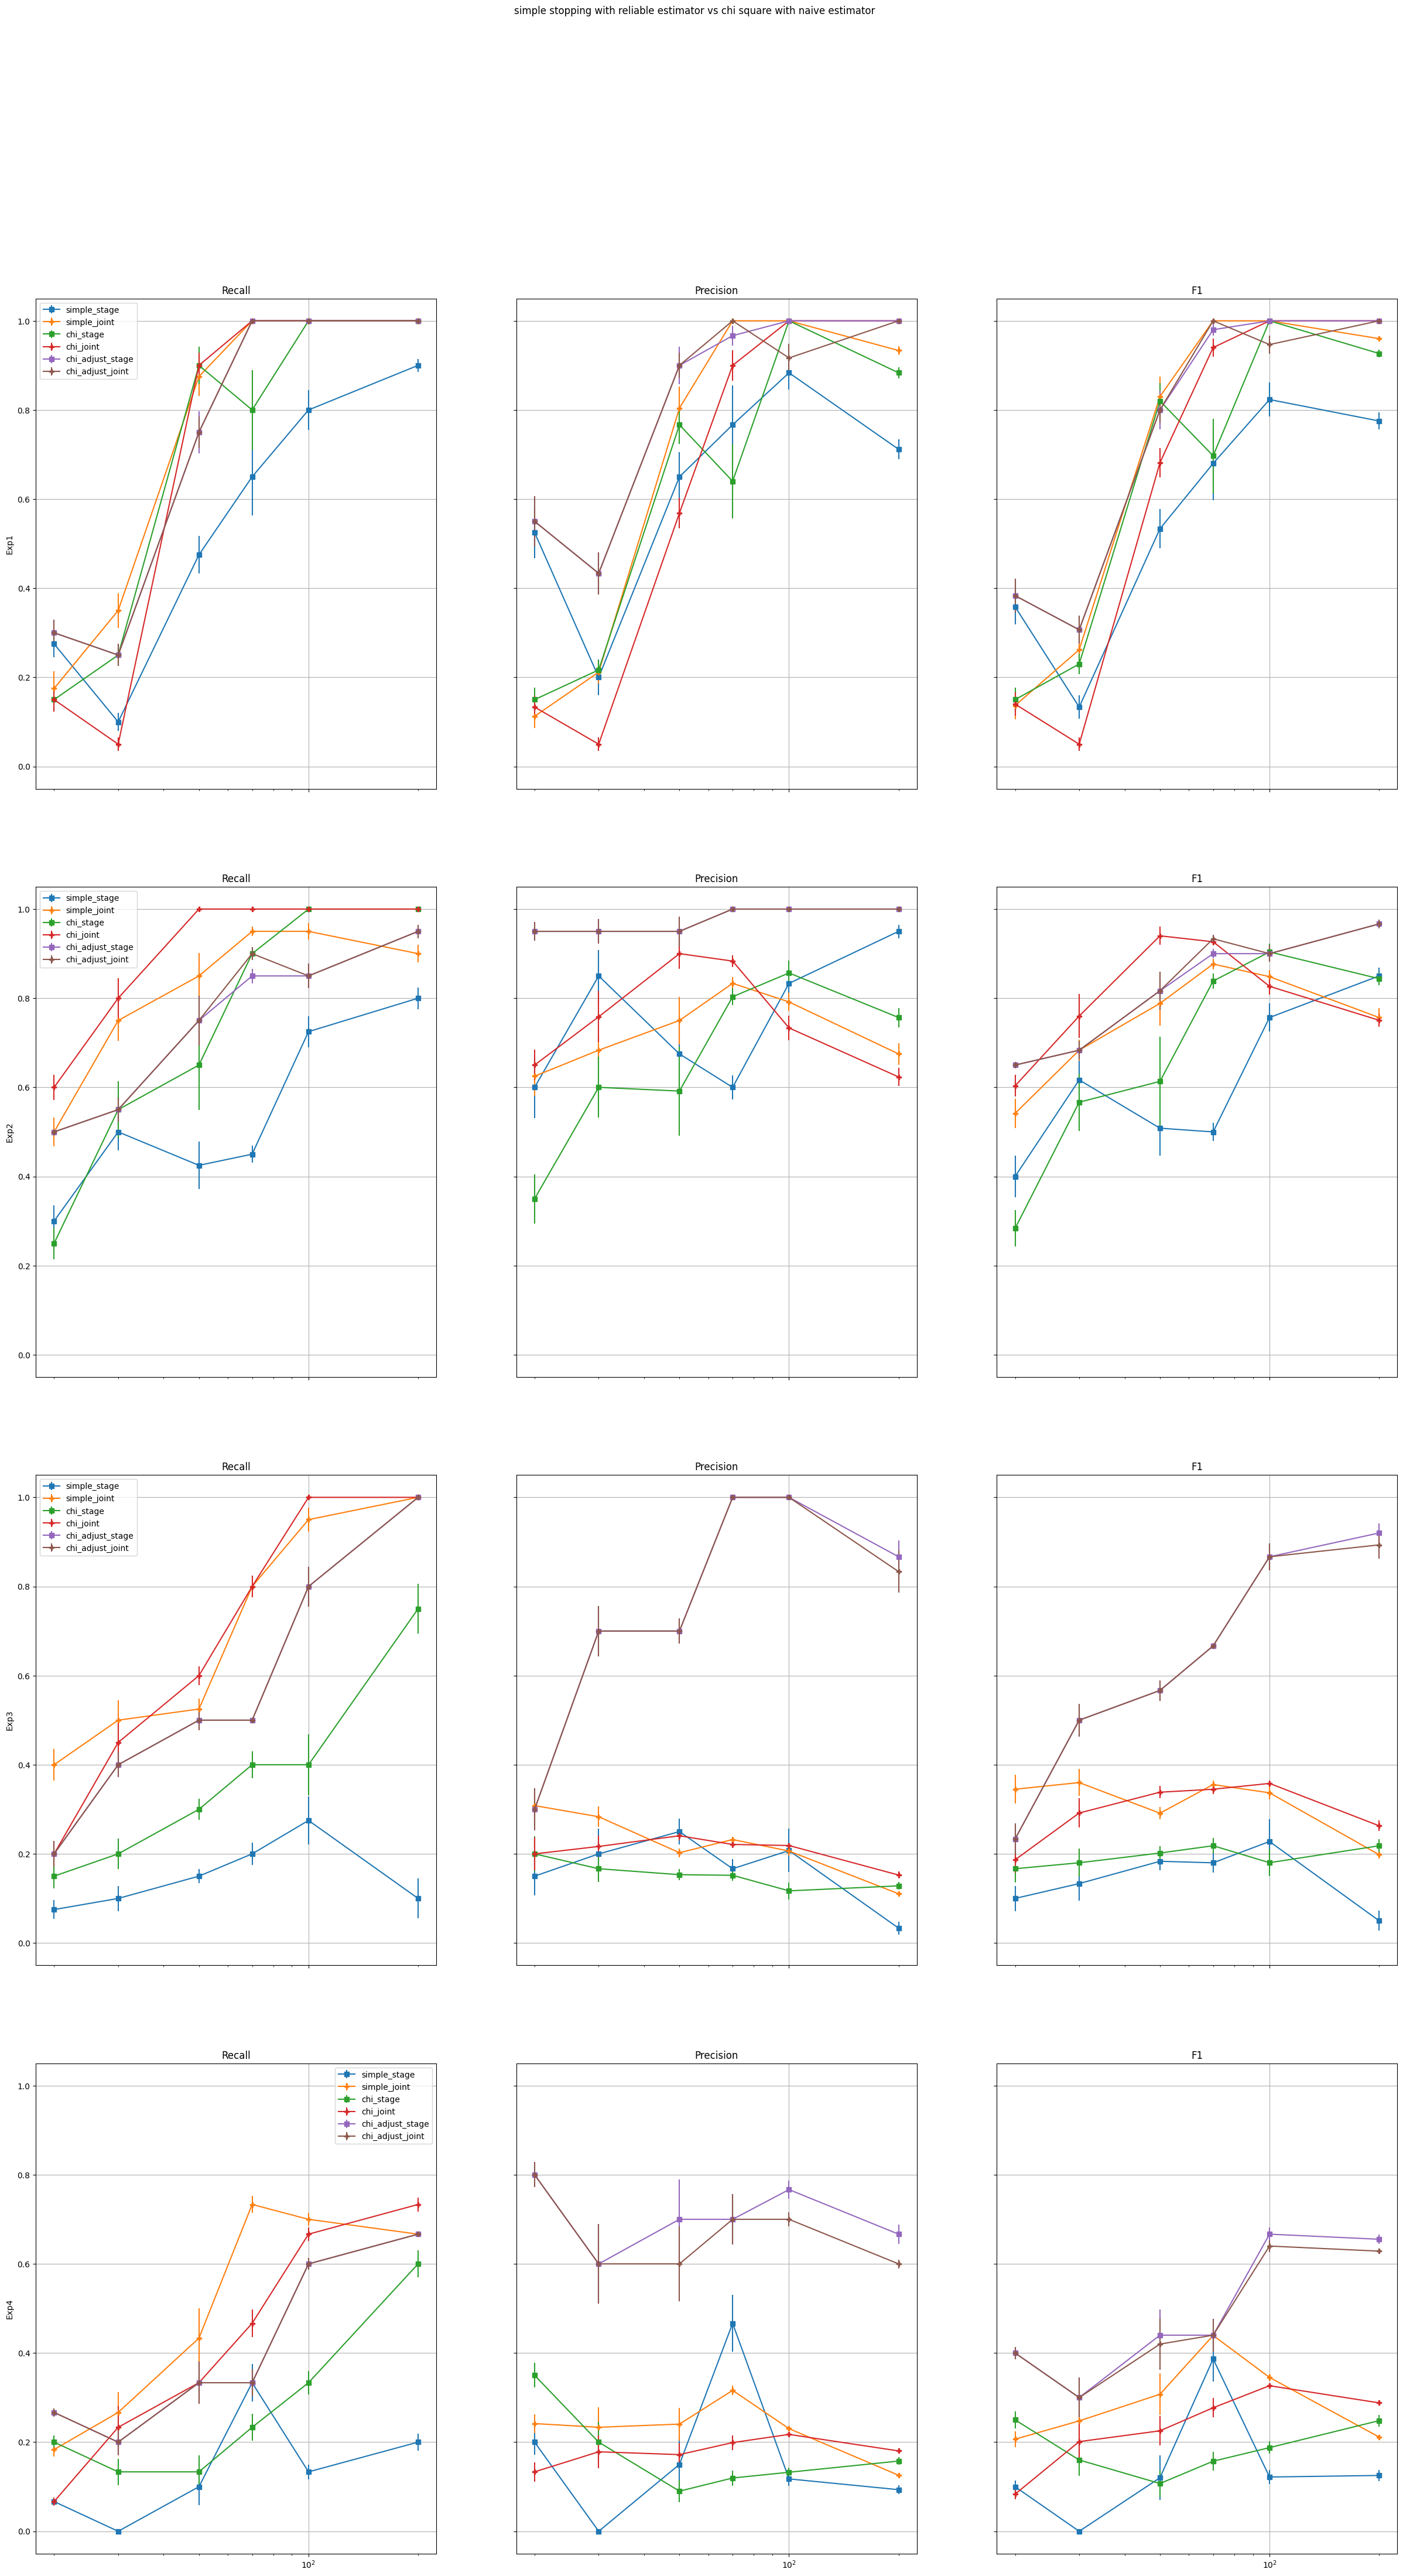

In [21]:
# permutation vs chi_square
from plotting import plotDf

fig, axs = plt.subplots(4,3, sharey=True, sharex=True, figsize=(30,50))

plotDf(exp1files_lazy, exp1path_lazy, axs[0, 0], axs[0, 1], axs[0, 2], 'Experiment1', xalbel_name=False, legend=True, title=True, label_name=['simple_stage', 'simple_joint'])
plotDf(exp2files_lazy, exp2path_lazy, axs[1, 0], axs[1, 1], axs[1, 2], 'Experiment2', xalbel_name=False, label_name=['simple_stage', 'simple_joint'])
plotDf(exp3files_lazy, exp3path_lazy, axs[2, 0], axs[2, 1], axs[2, 2], 'Experiment3', xalbel_name=False, label_name=['simple_stage', 'simple_joint'])
plotDf(exp4files_lazy, exp4path_lazy, axs[3, 0], axs[3, 1], axs[3, 2], 'Experiment4', xalbel_name=False, label_name=['simple_stage', 'simple_joint'])
# plotDf(exp5files_lazy, exp5path_lazy, axs[4, 0], axs[4, 1], axs[4, 2], 'Experiment5', xalbel_name=False, label_name=['simple_stage', 'simple_joint'])


plotDf(exp1files_chi, exp1path_chi, axs[0, 0], axs[0, 1], axs[0, 2], 'Experiment1', xalbel_name=False, label_name=['chi_stage', 'chi_joint'])
plotDf(exp2files_chi, exp2path_chi, axs[1, 0], axs[1, 1], axs[1, 2], 'Experiment2', xalbel_name=False, label_name=['chi_stage', 'chi_joint'])
plotDf(exp3files_chi, exp3path_chi, axs[2, 0], axs[2, 1], axs[2, 2], 'Experiment3', xalbel_name=False, label_name=['chi_stage', 'chi_joint'])
plotDf(exp4files_chi, exp4path_chi, axs[3, 0], axs[3, 1], axs[3, 2], 'Experiment4', xalbel_name=False, label_name=['chi_stage', 'chi_joint'])

plotDf(exp1files_chi_adjust, exp1path_chi_adjust, axs[0, 0], axs[0, 1], axs[0, 2], 'Experiment1', xalbel_name=False, label_name=['chi_adjust_stage', 'chi_adjust_joint'])
plotDf(exp2files_chi_adjust, exp2path_chi_adjust, axs[1, 0], axs[1, 1], axs[1, 2], 'Experiment2', xalbel_name=False, label_name=['chi_adjust_stage', 'chi_adjust_joint'])
plotDf(exp3files_chi_adjust, exp3path_chi_adjust, axs[2, 0], axs[2, 1], axs[2, 2], 'Experiment3', xalbel_name=False, label_name=['chi_adjust_stage', 'chi_adjust_joint'])
plotDf(exp4files_chi_adjust, exp4path_chi_adjust, axs[3, 0], axs[3, 1], axs[3, 2], 'Experiment4', xalbel_name=False, label_name=['chi_adjust_stage', 'chi_adjust_joint'])
# plotDf(exp5files_chi_adjust, exp5path_chi_adjust, axs[4, 0], axs[4, 1], axs[4, 2], 'Experiment5', xalbel_name=False, label_name=['chi_stage', 'chi_joint'])



axs[0, 0].set_ylabel('Exp1')
axs[1, 0].set_ylabel('Exp2')
axs[2, 0].set_ylabel('Exp3')
axs[3, 0].set_ylabel('Exp4')
# axs[4, 0].set_ylabel('Exp5')
fig.suptitle('simple stopping with reliable estimator vs chi square with naive estimator')

Text(0.5, 1.0, 'Stopping Criteria all irrelevant variable selection')

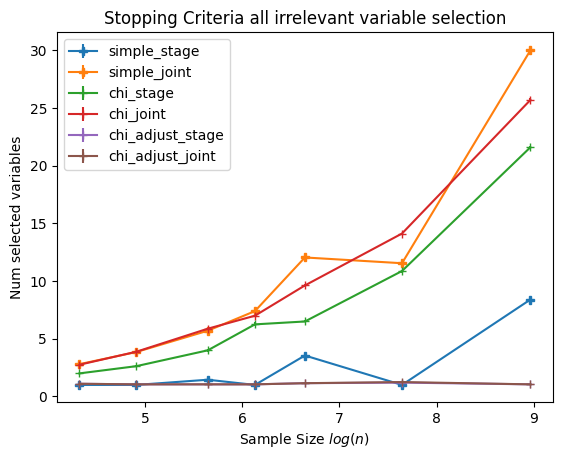

In [9]:
import matplotlib.pyplot as plt

label_list_lazy, mean_list_lazy, std_list_lazy = count_variable_plot(exp5path_lazy, exp5files_lazy)
label_list_chi_adjust, mean_list_chi_adjust, std_list_chi_adjust = count_variable_plot(exp5path_chi_adjust, exp5files_chi_adjust)
label_list_chi, mean_list_chi, std_list_chi = count_variable_plot(exp5path_chi, exp5files_chi)


plt.errorbar(list(map(math.log2, label_list_lazy)), mean_list_lazy[0], marker="P", yerr = std_list_lazy[0], label='simple_stage')
plt.errorbar(list(map(math.log2, label_list_lazy)), mean_list_lazy[1], marker="P", yerr = std_list_lazy[1], label='simple_joint')

plt.errorbar(list(map(math.log2, label_list_chi)), mean_list_chi[0], marker="+", yerr = std_list_chi[0], label='chi_stage')
plt.errorbar(list(map(math.log2, label_list_chi)), mean_list_chi[1], marker="+", yerr = std_list_chi[1], label='chi_joint')

plt.errorbar(list(map(math.log2, label_list_chi_adjust)), mean_list_chi_adjust[0], marker="+", yerr = std_list_chi_adjust[0], label='chi_adjust_stage')

plt.errorbar(list(map(math.log2, label_list_chi_adjust)), mean_list_chi_adjust[1], marker="+", yerr = std_list_chi_adjust[1], label='chi_adjust_joint')


plt.legend()
plt.xlabel('Sample Size $log(n)$')
plt.ylabel('Num selected variables')
plt.title('Stopping Criteria all irrelevant variable selection')